In [1]:
# 예제 9.1 : MNIST 데이터세트 불러오기
import tensorflow as tf

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


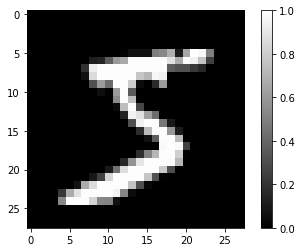

5


In [2]:
# 예제 9.2 : MNIST 데이터세트 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap = 'gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [3]:
# 예제 9.3 : Dense 오토인코더 모델 정의
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(784, activation = "relu", input_shape = (784, )),
                             tf.keras.layers.Dense(64, activation = "relu"),
                             tf.keras.layers.Dense(784, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 예제 9.4 : Dense 오토인코더 모델 학습
model.fit(train_X, train_X, epochs = 10, batch_size = 256)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0509
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0176
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0122
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0101
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0089
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0075
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0064


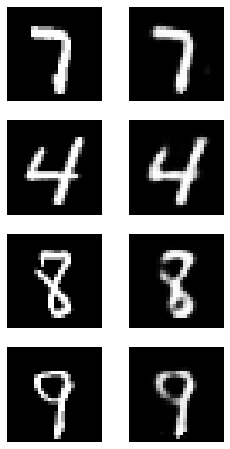

313/313 [==============================] - 0s 1ms/step - loss: 0.0061


0.006107266992330551

In [7]:
# 예제 9.5 : 테스트 데이터로 Dense 오토인코더의 이미지 재생성
import random
import numpy as np

plt.figure(figsize = (4, 8))

for c in range(4):
  plt.subplot(4, 2, c * 2 + 1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap = 'gray')
  plt.axis('off')

  plt.subplot(4, 2, c * 2 + 2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis = 0))
  plt.imshow(img.reshape(28, 28), cmap = 'gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

In [12]:
# 예제 9.6 : 컨볼루션 오토인코더 모델 정의
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, strides = (2, 2), activation = "relu", input_shape = (28, 28, 1)),
                             tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, strides = (2, 2), activation = "relu"),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation = "relu"),
                             tf.keras.layers.Dense(7 * 7 * 64, activation = "relu"),
                             tf.keras.layers.Reshape(target_shape = (7, 7, 64)),
                             tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = 2, strides = (2, 2), padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 2, strides = (2, 2), padding = 'same', activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_6 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)       

In [13]:
# 예제 9.7 : 컨볼루션 오토인코더 모델 학습
model.fit(train_X, train_X, epochs = 20, batch_size = 256)

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0783
Epoch 2/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0313
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0211
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0186
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0174
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0167
Epoch 7/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0163
Epoch 8/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0159
Epoch 9/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0157
Epoch 10/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0155
Epoch 11/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0153
Epoch 12/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0152
Epoch 13/20
235/235 [====

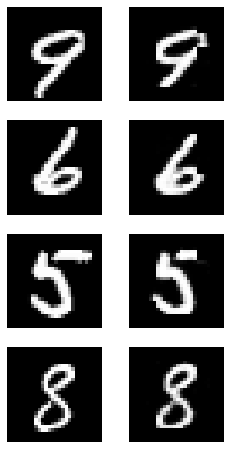

313/313 [==============================] - 1s 2ms/step - loss: 0.0143


0.014265983365476131

In [16]:
# 예제 9.8 : 테스트 데이터로 컨볼루션 오토인코더의 이미지 재생성
import random

plt.figure(figsize = (4, 8))
for c in range(4):
  plt.subplot(4, 2, c * 2 + 1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap = 'gray')
  plt.axis('off')

  plt.subplot(4, 2, c * 2 + 2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis = 0))
  plt.imshow(img.reshape(28, 28), cmap = 'gray')
  plt.axis('off')
plt.show()

model.evaluate(test_X, test_X)

In [17]:
# 에제 9.9 : 활성화함수를 elu로 바꾼 컨볼루션 오토인코더 모델의 정의 및 학습
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, strides = (2, 2), activation = 'elu', input_shape = (28, 28, 1)),
                             tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, strides = (2, 2), activation = 'elu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation = 'elu'),
                             tf.keras.layers.Dense(7 * 7 * 64, activation = 'elu'),
                             tf.keras.layers.Reshape(target_shape = (7, 7, 64)),
                             tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = 2, strides = (2, 2), padding = 'same', activation = 'elu'),
                             tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 2, strides = (2, 2), padding = 'same', activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'mse')
model.fit(train_X, train_X, epochs = 20, batch_size = 256)

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0558
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0180
Epoch 3/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0116
Epoch 4/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0097
Epoch 5/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0088
Epoch 6/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0083
Epoch 7/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0079
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0076
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0072
Epoch 10/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0069
Epoch 11/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0068
Epoch 12/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0066
Epoch 13/20
235/235 [====

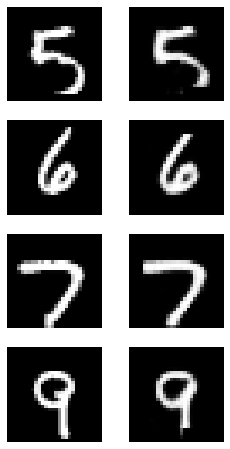

313/313 [==============================] - 1s 2ms/step - loss: 0.0057


0.005729382857680321

In [18]:
# 예제 9.10 : 테스트 데이터로 컨볼루션 오토인코더의 이미지 재생성
import random

plt.figure(figsize = (4, 8))
for c in range(4):
  plt.subplot(4, 2, c * 2 + 1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap = 'gray')
  plt.axis('off')

  plt.subplot(4, 2, c * 2 + 2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis = 0))
  plt.imshow(img.reshape(28, 28), cmap = 'gray')
  plt.axis('off')
plt.show()

model.evaluate(test_X, test_X)